In [1]:
import pandas as pd

df = pd.read_csv('../data/GDP.csv')

df.head()

,Unnamed: 0,Country/Territory,UN_Region,IMF_Estimate,IMF_Year,WorldBank_Estimate,WorldBank_Year,UN_Estimate,UN_Year
0,1,Monaco,Europe,0,0,234316,2021,234317,2021
1,2,Liechtenstein,Europe,0,0,157755,2020,169260,2021
2,3,Luxembourg,Europe,132372,2023,133590,2021,133745,2021
3,4,Ireland,Europe,114581,2023,100172,2021,101109,2021
4,5,Bermuda,Americas,0,0,114090,2021,112653,2021


1. remove trash (like symbols /_)
2. compare all numerical values
3. need to find out the top countries by values and display it on ascending way to make top 10
4. using existed pandas functions (groupby and mean) i want to select all the countries in all regions (EU, Africa, Asia etc) & calculate a total value of each GDP column (all estimated values)

In [2]:
df.columns = df.columns.str.replace("/", "_") #remove extra or unnecessary symbols

In [3]:
df["IMF_vs_WB"] = df["IMF_Estimate"] - df["WorldBank_Estimate"]
df["IMF_vs_UN"] = df["IMF_Estimate"] - df["UN_Estimate"]
df["WB_vs_UN"]  = df["WorldBank_Estimate"] - df["UN_Estimate"]

#compare values

/var/folders/wn/yv_4s6ys35z6ldk5d54s1k6h0000gn/T/ipykernel_59654/1406681623.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Country_Territory', y='IMF_Estimate', data=top_countries, palette='tab10')


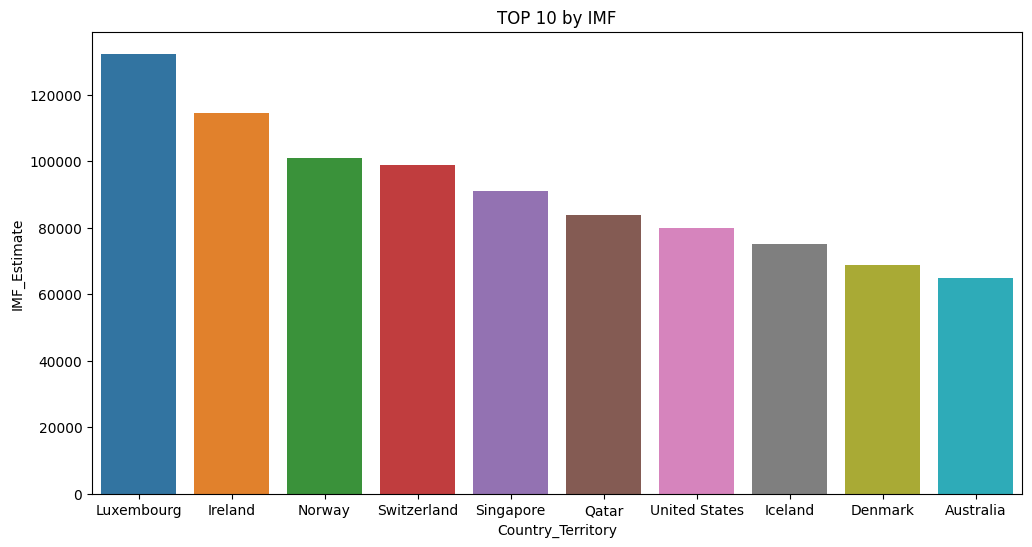

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

top_countries = df.sort_values("IMF_Estimate", ascending=False).head(10)

#rank top 10 countries by GDP
#i sorted values inside IMF Estimate and requested to set it my numbers on ascende and printed top 10

plt.figure(figsize=(12,6))
sns.barplot(x='Country_Territory', y='IMF_Estimate', data=top_countries, palette='tab10')
plt.title('TOP 10 by IMF')
plt.show() 


#after conducted sortation, it's better to show an outcome via barchart


/var/folders/wn/yv_4s6ys35z6ldk5d54s1k6h0000gn/T/ipykernel_59654/465589502.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='UN_Region', y='UN_Estimate', data=top_countries, palette='tab10')


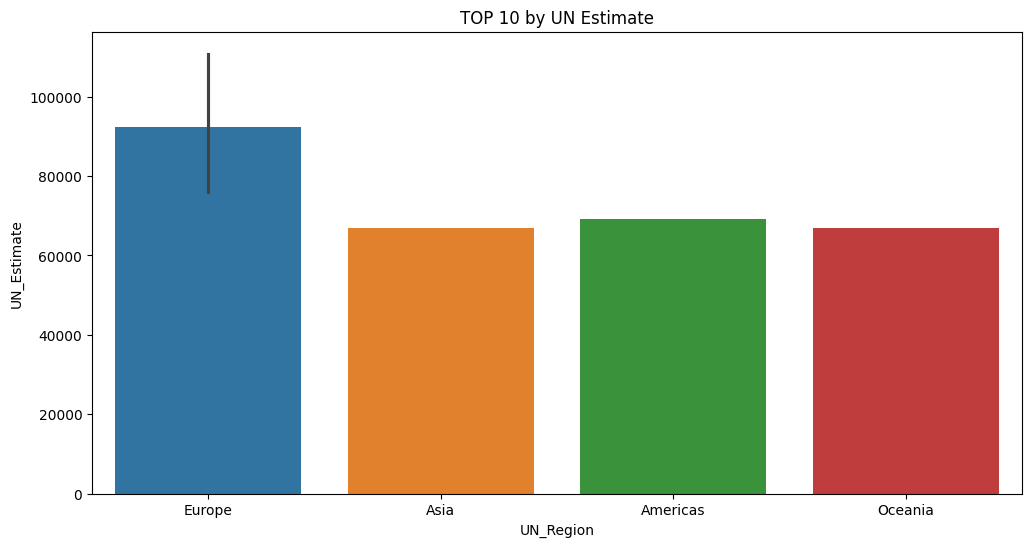

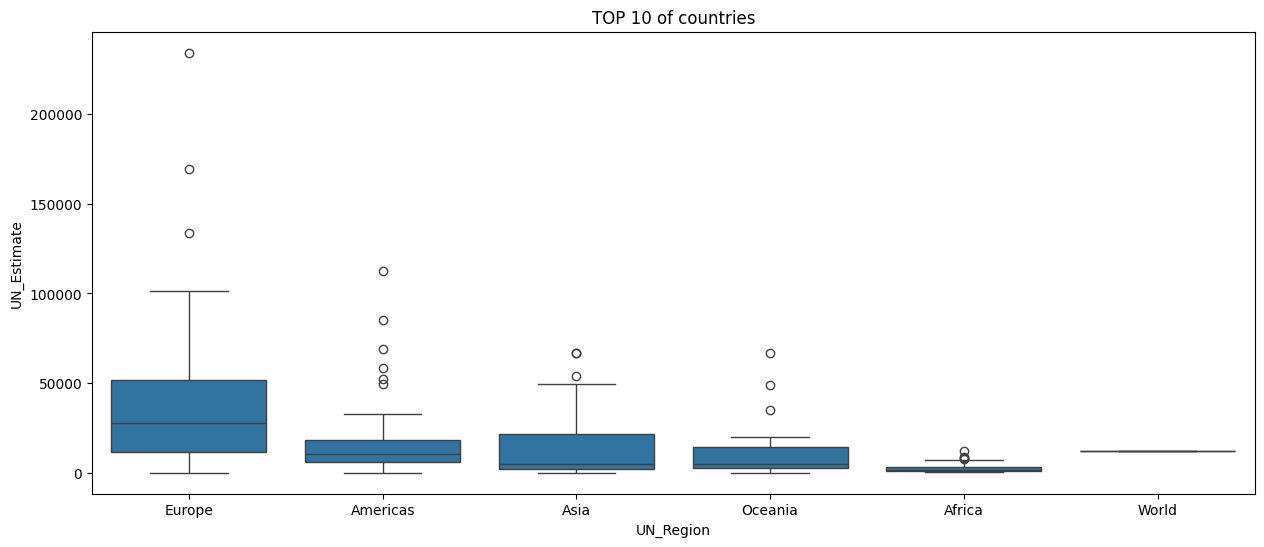

In [11]:
top_regions = df.groupby("UN_Region")[["IMF_Estimate","WorldBank_Estimate","UN_Estimate"]].mean()

#create a function groupby withing region UN region, and inside i gave columns to compare and by func mean it returned meaning of values (sum) by set axies

plt.figure(figsize=(12,6))
sns.barplot(x='UN_Region', y='UN_Estimate', data=top_countries, palette='tab10')
plt.title('TOP 10 by UN Estimate')
plt.show()

plt.figure(figsize=(15, 6))
sns.boxplot(x='UN_Region', y='UN_Estimate', data=df)
plt.title('GDP AVG By Region')
plt.xlabel('UN_Region')
plt.ylabel('UN_Estimate')
plt.show()

#Added boxplot for more clear understanding of the GDP by region